# AMAZON SALES

## Solved by Naman Sonker for InnoByte Services Intern

### Problem Statement
The provided dataset contains information about sales transactions on Amazon, including details such as order
ID, date, status, fulfilment method, sales channel, product category, size, quantity, amount, shipping details,
and more. The objective is to conduct a comprehensive analysis of the data and extract actionable insights to
support business decision-making.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Amazon.csv',encoding='unicode_escape')
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [3]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')

In [4]:
df.describe()

,index,Qty,Amount,ship-postal-code,New,PendingS
count,128976.000000,128976.000000,121176.000000,128941.000000,0.0,0.0
mean,64486.130427,0.904401,648.562176,463945.677744,NaN,NaN
std,37232.897832,0.313368,281.185041,191458.488954,NaN,NaN
min,0.000000,0.000000,0.000000,110001.000000,NaN,NaN
25%,32242.750000,1.000000,449.000000,382421.000000,NaN,NaN
50%,64486.500000,1.000000,605.000000,500033.000000,NaN,NaN
75%,96730.250000,1.000000,788.000000,600024.000000,NaN,NaN
max,128974.000000,15.000000,5584.000000,989898.000000,NaN,NaN


In [54]:
# Eleminating unhelpful data

In [5]:
df.drop(['New'],axis=1,inplace=True)
df.drop(['PendingS'],axis=1,inplace=True)
df.drop(['ship-country'],axis=1,inplace=True)
df.drop(['index'],axis=1,inplace=True)
df.drop(['currency'],axis=1,inplace=True)
df.drop(['ship-postal-code'],axis=1,inplace=True)
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,B2B,fulfilled-by
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,647.62,MUMBAI,MAHARASHTRA,False,Easy Ship
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,406.00,BENGALURU,KARNATAKA,False,Easy Ship
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,True,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,753.33,PUDUCHERRY,PUDUCHERRY,False,Easy Ship
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,574.00,CHENNAI,TAMIL NADU,False,NaN


In [6]:
#Spliting dates for month analysis

df['Day']=df['Date'].str.split('-').str[1]
df['Month']=df['Date'].str.split('-').str[0]
df['Year']=df['Date'].str.split('-').str[2]

In [7]:
df.drop(['Date'],axis=1,inplace=True)
df.head()

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,B2B,fulfilled-by,Day,Month,Year
0,405-8078784-5731545,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,647.62,MUMBAI,MAHARASHTRA,False,Easy Ship,30,04,22
1,171-9198151-1101146,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,406.00,BENGALURU,KARNATAKA,False,Easy Ship,30,04,22
2,404-0687676-7273146,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,True,NaN,30,04,22
3,403-9615377-8133951,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,753.33,PUDUCHERRY,PUDUCHERRY,False,Easy Ship,30,04,22
4,407-1069790-7240320,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,574.00,CHENNAI,TAMIL NADU,False,NaN,30,04,22


In [34]:
df['ship-state'].unique()

array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'CHANDIGARH', 'TELANGANA', 'ANDHRA PRADESH',
       'RAJASTHAN', 'DELHI', 'HARYANA', 'ASSAM', 'JHARKHAND',
       'CHHATTISGARH', 'ODISHA', 'KERALA', 'MADHYA PRADESH',
       'WEST BENGAL', 'NAGALAND', 'Gujarat', 'UTTARAKHAND', 'BIHAR',
       'JAMMU & KASHMIR', 'PUNJAB', 'HIMACHAL PRADESH',
       'ARUNACHAL PRADESH', 'Goa', 'MEGHALAYA', 'GOA', 'MANIPUR',
       'TRIPURA', 'LADAKH', 'DADRA AND NAGAR', 'SIKKIM', 'Delhi', nan,
       'ANDAMAN & NICOBAR', 'Punjab', 'Rajshthan', 'Manipur', 'rajasthan',
       'Odisha', 'NL', 'Bihar', 'MIZORAM', 'punjab', 'New Delhi',
       'Rajasthan', 'Punjab/Mohali/Zirakpur', 'Puducherry', 'delhi', 'RJ',
       'Chandigarh', 'orissa', 'LAKSHADWEEP', 'goa', 'PB', 'APO',
       'Arunachal Pradesh', 'AR', 'Pondicherry', 'Sikkim',
       'Arunachal pradesh', 'Nagaland', 'bihar', 'Mizoram', 'rajsthan',
       'Orissa', 'Rajsthan', 'Meghalaya'], dtype=object)

In [35]:
#Missing value

In [221]:
df.isnull().sum()

Order ID                  0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
Amount                 7800
ship-city                35
ship-state               35
B2B                       0
fulfilled-by          89713
Day                       0
Month                     0
Year                      0
dtype: int64

In [8]:
df['Amount']=df['Amount'].fillna(df['Amount'].mean())
df['ship-city']=df['ship-city'].fillna(df['ship-city'].mode()[0])
df['ship-state']=df['ship-state'].fillna(df['ship-state'].mode()[0])

In [40]:
#Again Checking null values 

In [9]:
df.isnull().sum()

Order ID                  0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
Amount                    0
ship-city                 0
ship-state                0
B2B                       0
fulfilled-by          89713
Day                       0
Month                     0
Year                      0
dtype: int64

In [42]:
# As we can see "fulfilled-by" has numbers of missing values So, we drop it

In [10]:
df.drop(['fulfilled-by'],axis=1,inplace=True)

In [11]:
df.describe()

,Qty,Amount
count,128976.000000,128976.000000
mean,0.904401,648.562176
std,0.313368,272.549857
min,0.000000,0.000000
25%,1.000000,459.000000
50%,1.000000,635.000000
75%,1.000000,771.000000
max,15.000000,5584.000000


In [12]:
df.head()

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,B2B,Day,Month,Year
0,405-8078784-5731545,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,647.62,MUMBAI,MAHARASHTRA,False,30,04,22
1,171-9198151-1101146,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,406.00,BENGALURU,KARNATAKA,False,30,04,22
2,404-0687676-7273146,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,True,30,04,22
3,403-9615377-8133951,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,753.33,PUDUCHERRY,PUDUCHERRY,False,30,04,22
4,407-1069790-7240320,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,574.00,CHENNAI,TAMIL NADU,False,30,04,22


In [190]:
#Status is taken widley 

In [13]:
df['Status']=df['Status'].str.split(' ').str[0]

In [14]:
df['Month']=df['Month'].map({'03':'March','04':'April','05':'May','06':'June'})

In [15]:
df.head()

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,B2B,Day,Month,Year
0,405-8078784-5731545,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,647.62,MUMBAI,MAHARASHTRA,False,30,April,22
1,171-9198151-1101146,Shipped,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,406.00,BENGALURU,KARNATAKA,False,30,April,22
2,404-0687676-7273146,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,True,30,April,22
3,403-9615377-8133951,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,753.33,PUDUCHERRY,PUDUCHERRY,False,30,April,22
4,407-1069790-7240320,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,574.00,CHENNAI,TAMIL NADU,False,30,April,22


In [312]:
df['Amount'].min()

0.0

In [16]:
df.shape

(128976, 16)

# 1. Sales Overview:

In [17]:
dff = df.groupby(["Sales Channel","Month"]).Amount.sum().reset_index()

In [19]:
sales_overview = df.groupby('Month').agg({'Amount': 'sum', 'Order ID': 'count'}).reset_index()
sales_overview.rename(columns={'Order ID': 'Number of Orders'}, inplace=True)

In [22]:
sales_overview.head(10)

,Month,Amount,Number of Orders
0,April,3.078448e+07,49068
1,June,2.490648e+07,37697
2,March,1.075209e+05,171
3,May,2.785048e+07,42040


In [51]:
month_order = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
               'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
sales_overview['MonthOrder'] = sales_overview['Month'].map(month_order)
df_sorted = sales_overview.sort_values('MonthOrder').drop('MonthOrder', axis=1)
df_sorted.reset_index(drop=True, inplace=True)




In [52]:
df_sorted.head()

,Month,Amount,Number of Orders
0,March,1.075209e+05,171
1,April,3.078448e+07,49068
2,May,2.785048e+07,42040
3,June,2.490648e+07,37697


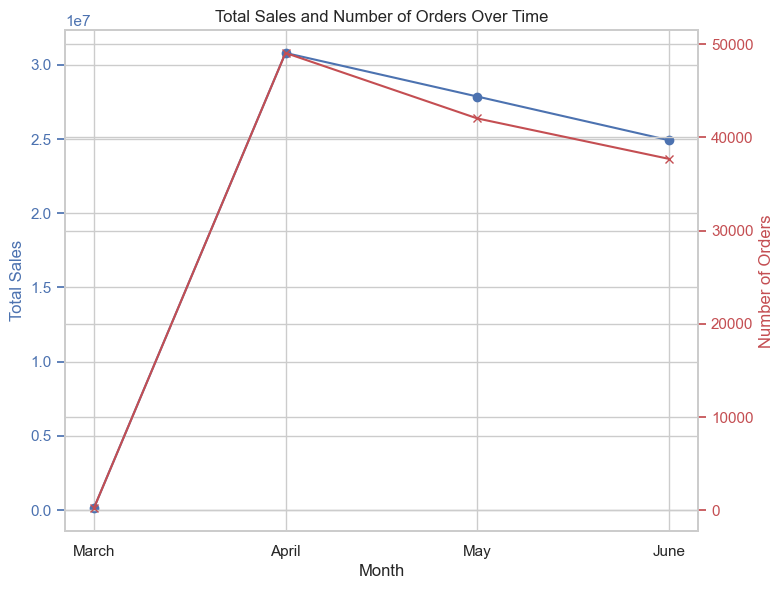

In [53]:
fig, ax1 = plt.subplots(figsize=(8,6))

ax1.plot(df_sorted['Month'], df_sorted['Amount'], color='b', marker='o', label='Total Sales')
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Sales', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(df_sorted['Month'], df_sorted['Number of Orders'], color='r', marker='x', label='Number of Orders')
ax2.set_ylabel('Number of Orders', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.title('Total Sales and Number of Orders Over Time')
plt.show()

Text(0, 0.5, 'Amount')

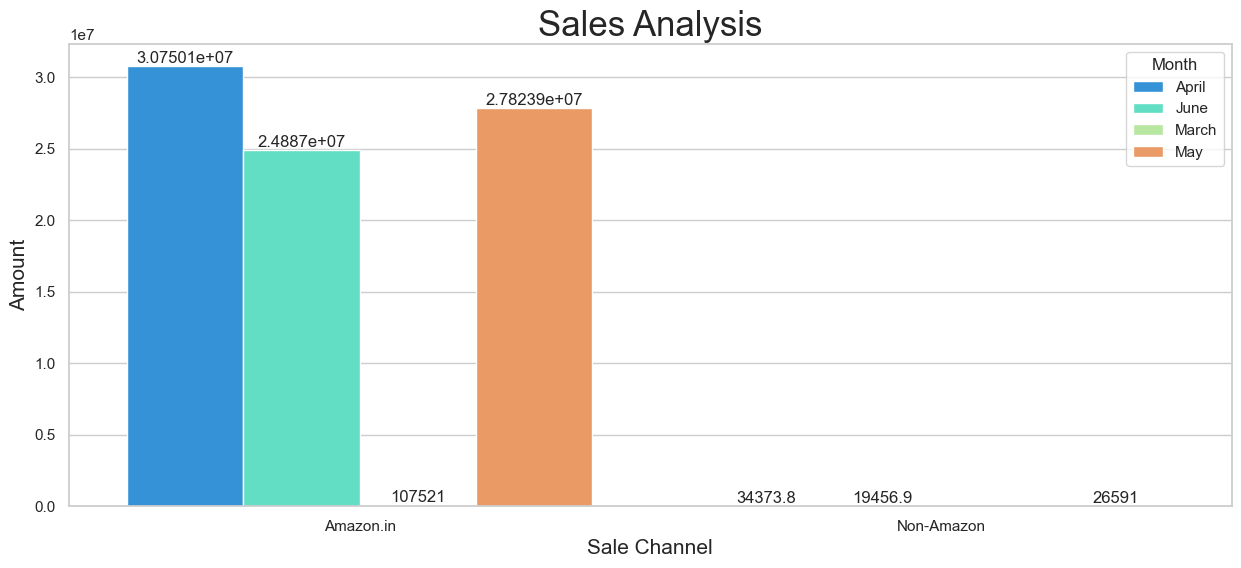

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))

ax=sns.barplot(x='Sales Channel',y='Amount',hue="Month",data=dff,width=0.8,palette='rainbow')
for container in ax.containers:
    ax.bar_label(container)
plt.title("Sales Analysis", fontsize=25)
plt.xlabel('Sale Channel', fontsize=15)
plt.ylabel('Amount', fontsize=15)

## Observation
Maximum sales recorded through the sales channel "Amazon.in" occurred in the following order: April, followed by May, June, and then March.

Maximum sales recorded through the "Non-Amazon" sales channel followed a similar trend: April, followed by May and then June.



In [76]:
dff.head(7)

,Sales Channel,Month,Amount
0,Amazon.in,April,3.075011e+07
1,Amazon.in,June,2.488702e+07
2,Amazon.in,March,1.075209e+05
3,Amazon.in,May,2.782389e+07
4,Non-Amazon,April,3.437380e+04
5,Non-Amazon,June,1.945687e+04
6,Non-Amazon,May,2.659105e+04


# 2. Product Analysis:

In [25]:
dfdf = df.groupby(["Category","Size","Qty"]).size().reset_index().rename(columns={0:'QtyCount'})

In [26]:
dfdf.head(10)

,Category,Size,Qty,QtyCount
0,Blazzer,3XL,0,160
1,Blazzer,3XL,1,1748
2,Blazzer,3XL,2,5
3,Blazzer,L,0,304
4,Blazzer,L,1,2535
5,Blazzer,L,2,5
6,Blazzer,M,0,272
7,Blazzer,M,1,2308
8,Blazzer,M,2,5
9,Blazzer,M,3,3


In [113]:
dfdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Category   155 non-null    object
 1   Size       155 non-null    object
 2   Qty        155 non-null    int64 
 3   Qty Count  155 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 5.0+ KB


In [27]:
dfdf = dfdf[(dfdf[['Qty']] != 0).all(axis=1)]

In [28]:
dfdf.head(10)

,Category,Size,Qty,QtyCount
1,Blazzer,3XL,1,1748
2,Blazzer,3XL,2,5
4,Blazzer,L,1,2535
5,Blazzer,L,2,5
7,Blazzer,M,1,2308
8,Blazzer,M,2,5
9,Blazzer,M,3,3
11,Blazzer,S,1,1947
12,Blazzer,S,2,8
14,Blazzer,XL,1,2116


In [29]:
df1 = dfdf.groupby(["Category","Size"]).QtyCount.sum().reset_index()

In [30]:
df1.tail()

,Category,Size,QtyCount
40,Trousers,XL,1730
41,Trousers,XS,868
42,Trousers,XXL,1679
43,Wallet,Free,841
44,Watch,Free,3


In [31]:
df1['QtyCount'].max()

8342

Text(0, 0.5, 'QtyCount')

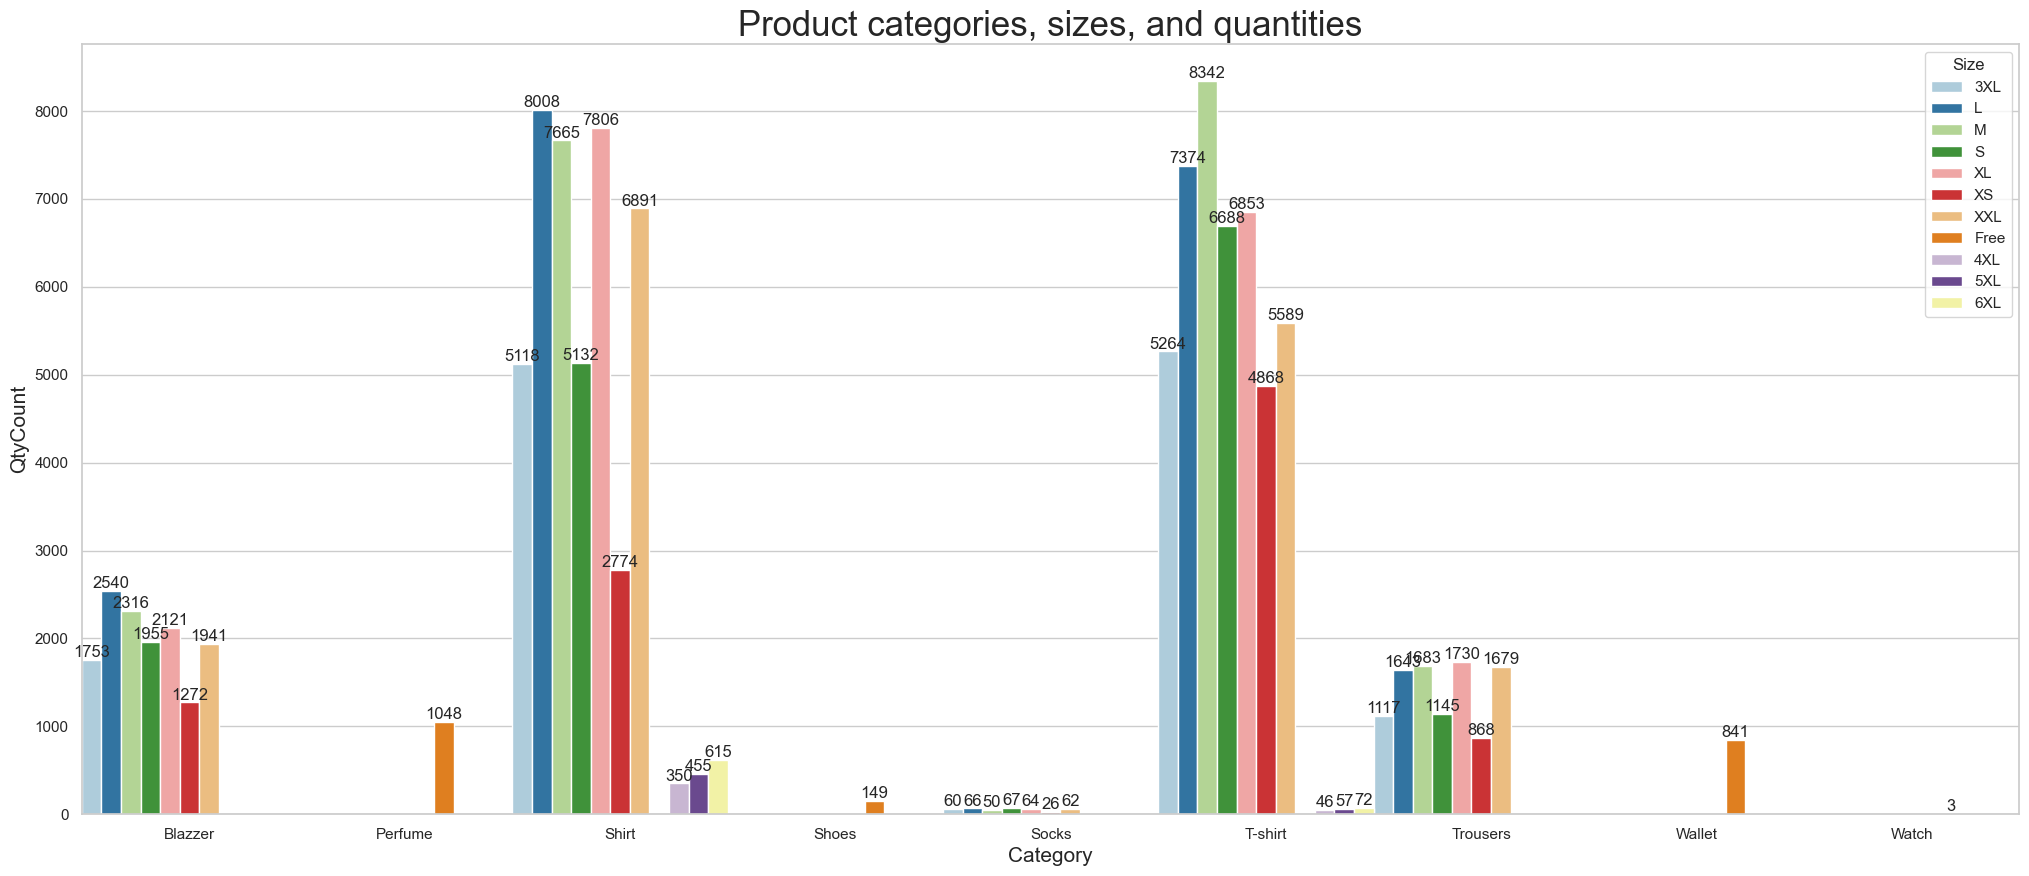

In [143]:
sns.set(style="whitegrid")
plt.figure(figsize=(25, 10))
plt.title("Product categories, sizes, and quantities",fontsize=25)
ax=sns.barplot(x='Category',y='QtyCount',hue="Size",data=df1,width=1,palette='Paired')
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Category', fontsize=15)
plt.ylabel('QtyCount', fontsize=15)

In [32]:
df2 = dfdf.groupby(["Category"]).QtyCount.sum().reset_index()

In [33]:
df2.head(10)

,Category,QtyCount
0,Blazzer,13898
1,Perfume,1048
2,Shirt,44814
3,Shoes,149
4,Socks,395
5,T-shirt,45153
6,Trousers,9865
7,Wallet,841
8,Watch,3


Text(0, 0.5, 'QtyCount')

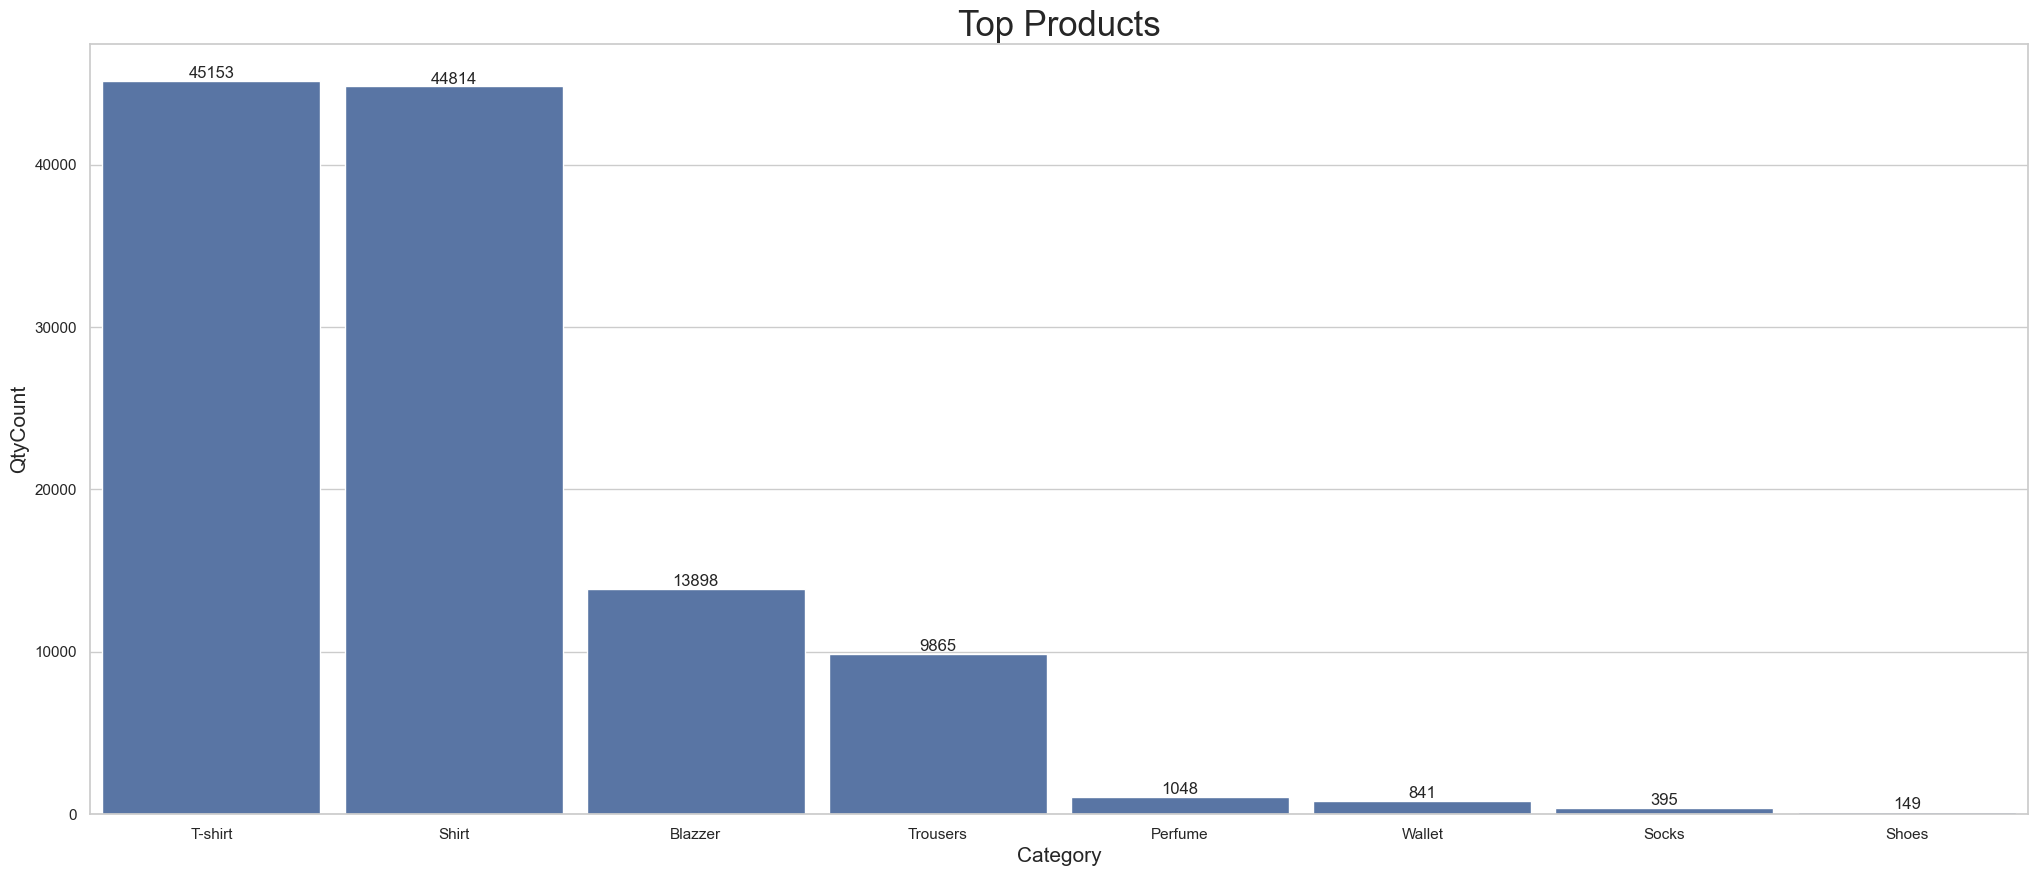

In [37]:
sns.set(style="whitegrid")
plt.figure(figsize=(25, 10))
plt.title("Top Products",fontsize=25)
sort = df2.sort_values('QtyCount', ascending=False).head(8)
ax=sns.barplot(x='Category',y='QtyCount',data=sort,width=0.9)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Category', fontsize=15)
plt.ylabel('QtyCount', fontsize=15)

## Observation

1. The most popular product is T-shirts, specifically in size Medium (M).
   
2. Other popular products include shirts, blazers, and trousers.

# 3. Fulfillment Analysis:

Text(0.5, 0, 'Status')

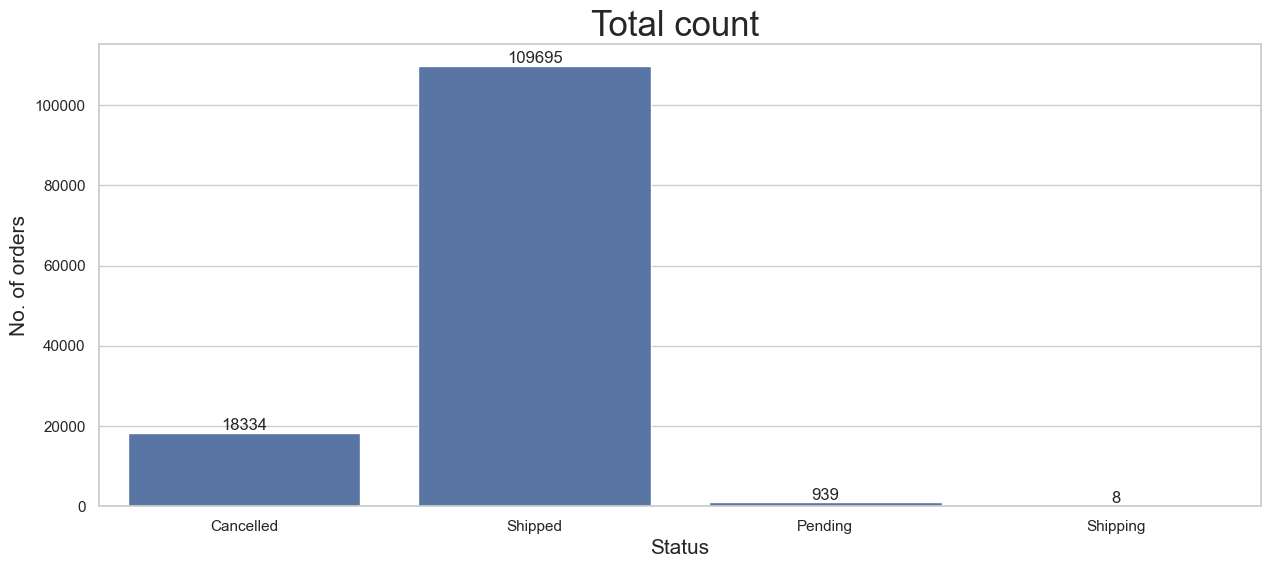

In [159]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
plt.title("Total count ",fontsize=25)
ax=sns.countplot(x='Status',data=df,width=0.8)
for container in ax.containers:
    ax.bar_label(container)
plt.ylabel('No. of orders', fontsize=15)
plt.xlabel('Status', fontsize=15)

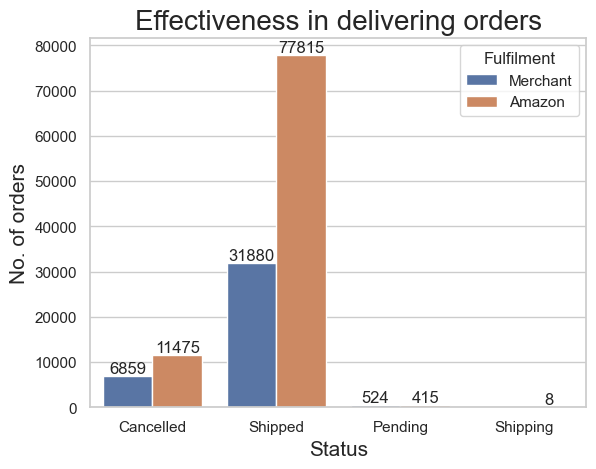

In [160]:
plt.title("Effectiveness in delivering orders",fontsize=20)
ax=sns.countplot(x='Status',hue='Fulfilment',data=df,gap=0)
plt.ylabel('No. of orders', fontsize=15)
plt.xlabel('Status', fontsize=15)
for container in ax.containers:
    ax.bar_label(container)

## Observation
Fulfillment on Amazon is managed through two primary methods: Fulfillment by Amazon (FBA) and Fulfillment by Merchant (FBM). Analyzing the data reveals that the majority of orders are predominantly fulfilled by Amazon through its FBA service.

# 4. Customer Segmentation:

In [314]:
df.head()

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,B2B,Day,Month,Year
0,405-8078784-5731545,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,647.62,MUMBAI,MAHARASHTRA,False,30,April,22
1,171-9198151-1101146,Shipped,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,406.00,BENGALURU,KARNATAKA,False,30,April,22
2,404-0687676-7273146,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,True,30,April,22
3,403-9615377-8133951,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,753.33,PUDUCHERRY,PUDUCHERRY,False,30,April,22
4,407-1069790-7240320,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,574.00,CHENNAI,TAMIL NADU,False,30,April,22


In [ ]:
#Rows with o quantity items are removed

In [315]:
df_f = df[(df[['Qty']] != 0).all(axis=1)]

In [316]:
df_f['Status'].unique()

array(['Shipped', 'Cancelled', 'Pending', 'Shipping'], dtype=object)

In [317]:
df_f.head()

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,B2B,Day,Month,Year
1,171-9198151-1101146,Shipped,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,406.0,BENGALURU,KARNATAKA,False,30,April,22
2,404-0687676-7273146,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,329.0,NAVI MUMBAI,MAHARASHTRA,True,30,April,22
4,407-1069790-7240320,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,574.0,CHENNAI,TAMIL NADU,False,30,April,22
5,404-1490984-4578765,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XL,Shipped,1,824.0,GHAZIABAD,UTTAR PRADESH,False,30,April,22
6,408-5748499-6859555,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,1,653.0,CHANDIGARH,CHANDIGARH,False,30,April,22


In [318]:
df_f.isnull().sum()

Order ID              0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
Amount                0
ship-city             0
ship-state            0
B2B                   0
Day                   0
Month                 0
Year                  0
dtype: int64

In [319]:
state_mapping = {
    'MAHARASHTRA': 'Maharashtra', 'KARNATAKA': 'Karnataka', 'PUDUCHERRY': 'Puducherry',
    'TAMIL NADU': 'Tamil Nadu', 'UTTAR PRADESH': 'Uttar Pradesh', 'CHANDIGARH': 'Chandigarh',
    'TELANGANA': 'Telangana', 'ANDHRA PRADESH': 'Andhra Pradesh', 'RAJASTHAN': 'Rajasthan',
    'DELHI': 'Delhi', 'HARYANA': 'Haryana', 'ASSAM': 'Assam', 'JHARKHAND': 'Jharkhand',
    'CHHATTISGARH': 'Chhattisgarh', 'ODISHA': 'Odisha', 'KERALA': 'Kerala',
    'MADHYA PRADESH': 'Madhya Pradesh', 'WEST BENGAL': 'West Bengal', 'NAGALAND': 'Nagaland',
    'Gujarat': 'Gujarat', 'UTTARAKHAND': 'Uttarakhand', 'BIHAR': 'Bihar',
    'JAMMU & KASHMIR': 'Jammu & Kashmir', 'PUNJAB': 'Punjab', 'HIMACHAL PRADESH': 'Himachal Pradesh',
    'ARUNACHAL PRADESH': 'Arunachal Pradesh', 'Goa': 'Goa', 'MEGHALAYA': 'Meghalaya',
    'GOA': 'Goa', 'MANIPUR': 'Manipur', 'TRIPURA': 'Tripura', 'LADAKH': 'Ladakh',
    'DADRA AND NAGAR': 'Dadra and Nagar Haveli and Daman and Diu', 'SIKKIM': 'Sikkim',
    'Delhi': 'Delhi', 'ANDAMAN & NICOBAR': 'Andaman & Nicobar Islands', 'Punjab': 'Punjab',
    'Rajshthan': 'Rajasthan', 'Manipur': 'Manipur', 'rajasthan': 'Rajasthan', 'Odisha': 'Odisha',
    'NL': 'Nagaland', 'Bihar': 'Bihar', 'MIZORAM': 'Mizoram', 'punjab': 'Punjab',
    'New Delhi': 'Delhi', 'Rajasthan': 'Rajasthan', 'Punjab/Mohali/Zirakpur': 'Punjab',
    'Puducherry': 'Puducherry', 'delhi': 'Delhi', 'RJ': 'Rajasthan', 'Chandigarh': 'Chandigarh',
    'orissa': 'Odisha', 'LAKSHADWEEP': 'Lakshadweep', 'goa': 'Goa', 'PB': 'Punjab',
    'APO': 'Andhra Pradesh', 'Arunachal Pradesh': 'Arunachal Pradesh', 'AR': 'Arunachal Pradesh',
    'Pondicherry': 'Puducherry', 'Sikkim': 'Sikkim', 'Arunachal pradesh': 'Arunachal Pradesh',
    'Nagaland': 'Nagaland', 'bihar': 'Bihar', 'Mizoram': 'Mizoram', 'rajsthan': 'Rajasthan',
    'Orissa': 'Odisha', 'Rajsthan': 'Rajasthan', 'Meghalaya': 'Meghalaya'
}


In [320]:
df_f['ship-state'] = df_f['ship-state'].map(state_mapping)

/var/folders/j7/yfj7nxc90952lcr5lx7fzy9r0000gn/T/ipykernel_50250/3846070247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['ship-state'] = df_f['ship-state'].map(state_mapping)


In [321]:
df_f['ship-state'].unique()

array(['Karnataka', 'Maharashtra', 'Tamil Nadu', 'Uttar Pradesh',
       'Chandigarh', 'Telangana', 'Andhra Pradesh', 'Rajasthan', 'Delhi',
       'Haryana', 'Assam', 'Jharkhand', 'Chhattisgarh', 'Odisha',
       'Kerala', 'Madhya Pradesh', 'West Bengal', 'Nagaland', 'Gujarat',
       'Uttarakhand', 'Bihar', 'Jammu & Kashmir', 'Punjab',
       'Himachal Pradesh', 'Arunachal Pradesh', 'Goa', 'Meghalaya',
       'Puducherry', 'Manipur', 'Tripura', 'Ladakh',
       'Dadra and Nagar Haveli and Daman and Diu', 'Sikkim',
       'Andaman & Nicobar Islands', 'Mizoram', 'Lakshadweep'],
      dtype=object)

In [242]:
#To study buying behaviour we will analysis order frequency on factors: city, state, category

In [249]:
df_f['Order ID'].duplicated().value_counts()

Order ID
False    108283
True       7883
Name: count, dtype: int64

In [245]:
# This tells all orders are not unique. There are repeat customer
#Now, we find order frequency

In [250]:
df_f['Customer ID'] = df_f['Order ID']

/var/folders/j7/yfj7nxc90952lcr5lx7fzy9r0000gn/T/ipykernel_50250/2393497719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['Customer ID'] = df_f['Order ID']


In [251]:
order_frequency = df_f.groupby('Customer ID')['Order ID'].count().reset_index()

In [252]:
order_frequency.columns = ['Customer ID', 'Order Frequency']

In [253]:
order_frequency.head()

,Customer ID,Order Frequency
0,171-0000547-8192359,1
1,171-0000902-4490745,1
2,171-0001409-6228339,1
3,171-0003082-5110755,1
4,171-0003738-2052324,1


In [254]:
order_frequency_state = df_f.groupby(['Customer ID', 'ship-state'])['Order ID'].count().reset_index()
order_frequency_state.columns = ['Customer ID', 'State', 'Order Frequency']

In [256]:
order_frequency_city = df_f.groupby(['Customer ID', 'ship-city'])['Order ID'].count().reset_index()
order_frequency_city.columns = ['Customer ID', 'City', 'Order Frequency']

In [257]:
state_order_frequency = order_frequency_state.groupby('State')['Order Frequency'].mean().reset_index()
state_order_frequency.columns = ['State', 'Average Order Frequency']

In [258]:
city_order_frequency = order_frequency_city.groupby('City')['Order Frequency'].mean().reset_index()
city_order_frequency.columns = ['City', 'Average Order Frequency']

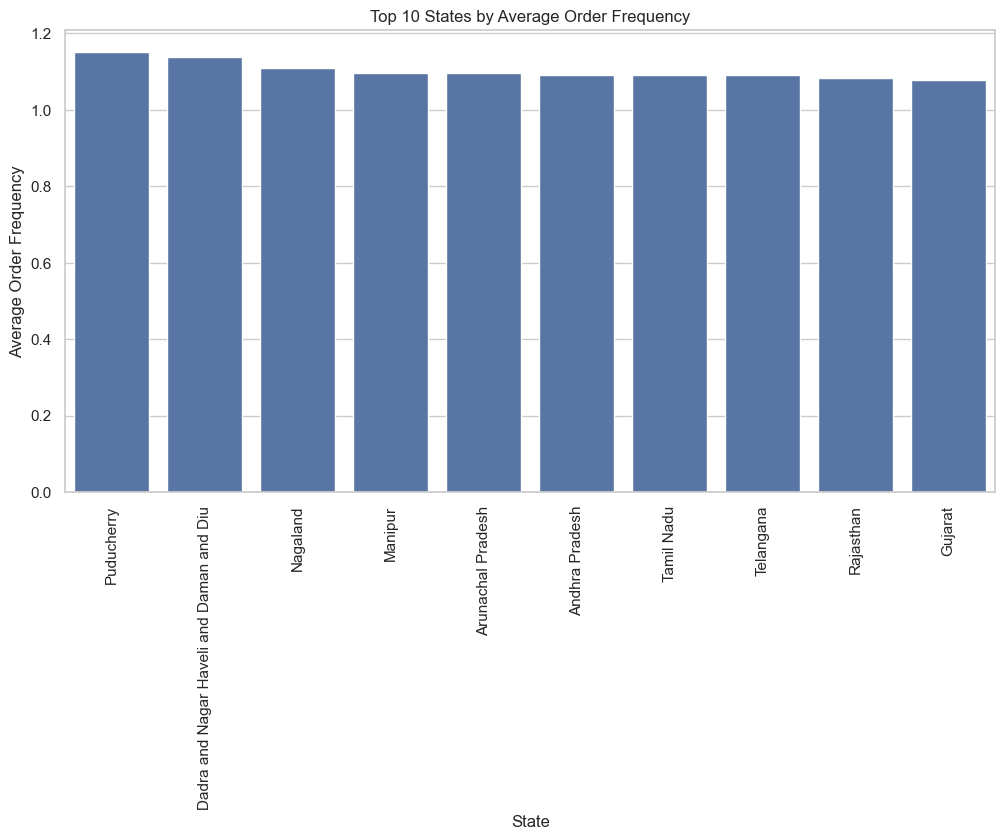

In [259]:
plt.figure(figsize=(12, 6))
top_States = state_order_frequency.sort_values('Average Order Frequency', ascending=False).head(10)
sns.barplot(x='State', y='Average Order Frequency', data=top_States)
plt.title('Top 10 States by Average Order Frequency')
plt.xticks(rotation=90)
plt.show()

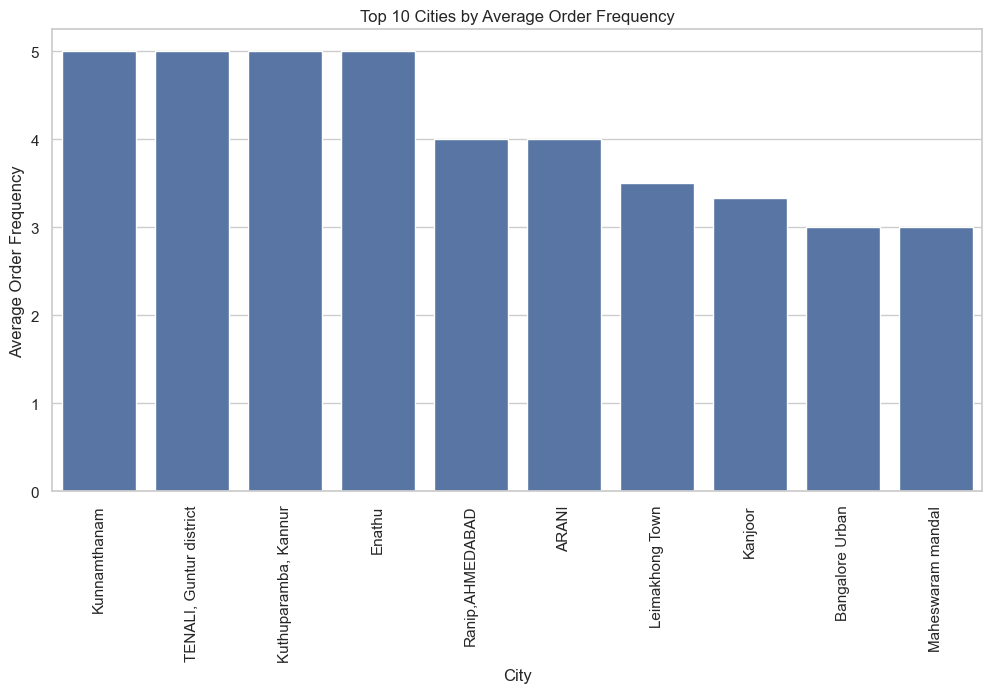

In [266]:
plt.figure(figsize=(12, 6))
top_cities = city_order_frequency.sort_values('Average Order Frequency', ascending=False).head(10)
sns.barplot(x='City', y='Average Order Frequency', data=top_cities)
plt.title('Top 10 Cities by Average Order Frequency')
plt.xticks(rotation=90)
plt.show()

/var/folders/j7/yfj7nxc90952lcr5lx7fzy9r0000gn/T/ipykernel_50250/2118607104.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Order Frequency', data=top_cities,palette='Paired')


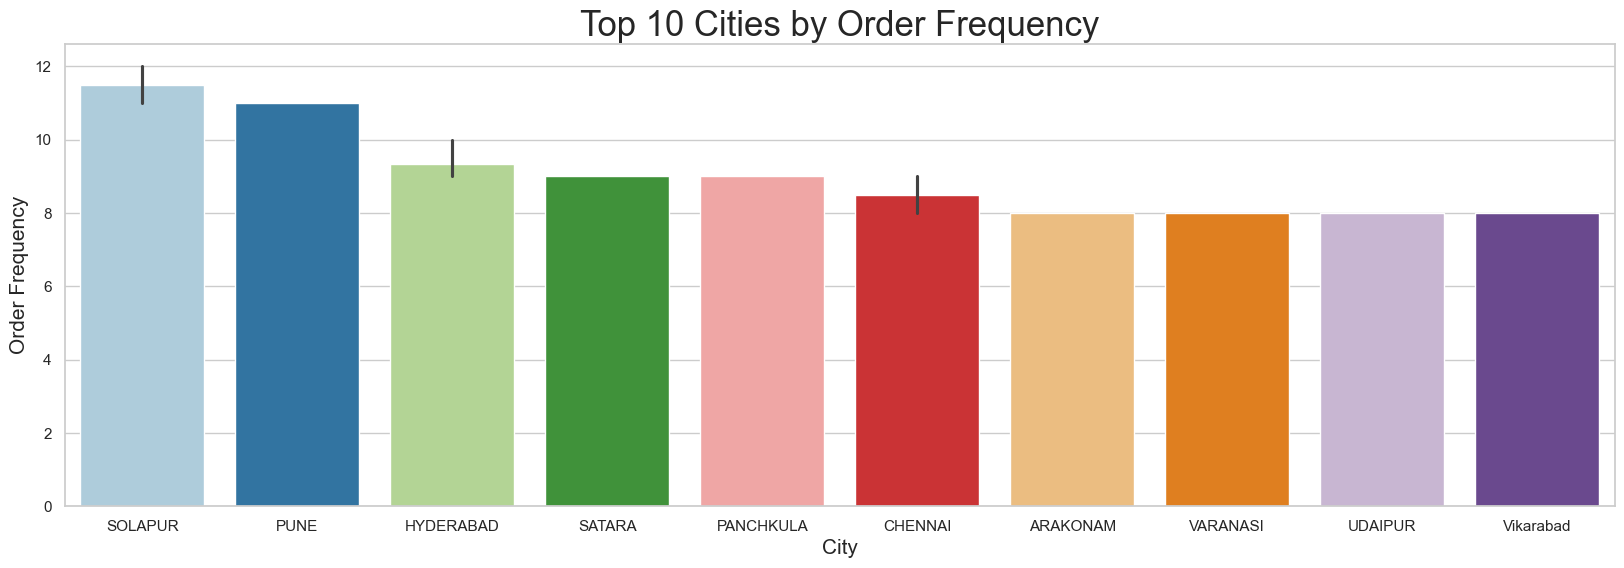

In [293]:
plt.figure(figsize=(20, 6))
top_cities = order_frequency_city.sort_values('Order Frequency', ascending=False).head(14)
sns.barplot(x='City', y='Order Frequency', data=top_cities,palette='Paired')
plt.title('Top 10 Cities by Order Frequency',fontsize=25)
plt.xlabel('City', fontsize=15)
plt.ylabel('Order Frequency', fontsize=15)
plt.xticks(rotation=0)
plt.show()

/var/folders/j7/yfj7nxc90952lcr5lx7fzy9r0000gn/T/ipykernel_50250/1341130341.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Order Frequency', data=top_states,palette='Paired')


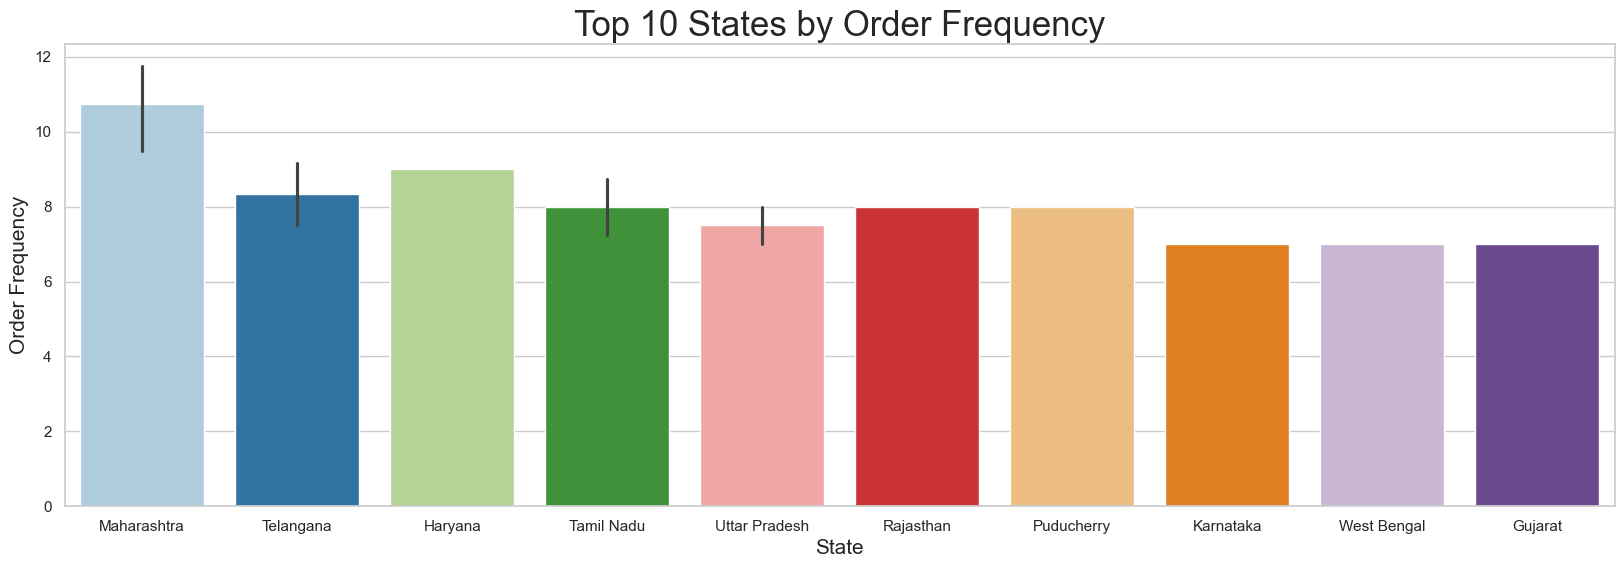

In [294]:
plt.figure(figsize=(20, 6))
top_states = order_frequency_state.sort_values('Order Frequency', ascending=False).head(24)
sns.barplot(x='State', y='Order Frequency', data=top_states,palette='Paired')
plt.title('Top 10 States by Order Frequency',fontsize=25)
plt.xlabel('State', fontsize=15)
plt.ylabel('Order Frequency', fontsize=15)
plt.xticks(rotation=0)
plt.show()

### Observation
We have analyzed the order frequency using Order ID and examined its variation across different states and cities. This analysis provides valuable insights into geographic patterns in customer behavior, enabling us to optimize business strategies effectively. By understanding these regional trends, we can tailor our marketing efforts, inventory management, and customer service to better meet the needs of our diverse customer base, ultimately driving increased sales and customer satisfaction.

# 5. Geographical Analysis:
Explore the geographical distribution of sales, focusing on states and cities.

In [329]:
df_g = df_f.groupby(["ship-city","ship-state"]).Amount.sum().reset_index()

In [333]:
df_g.head()

,ship-city,ship-state,Amount
0,(Chikmagalur disterict). (N.R pur thaluku),Karnataka,389.0
1,"(Via Cuncolim)Quepem,South Goa",Goa,1163.0
2,",HYDERABAD",Telangana,563.0
3,",raibarely road faizabad (Ayodhya)",Uttar Pradesh,1122.0
4,..katra,Jammu & Kashmir,641.0


In [334]:
df_g.shape

(8576, 3)

/var/folders/j7/yfj7nxc90952lcr5lx7fzy9r0000gn/T/ipykernel_50250/2966240276.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='ship-state', y='Amount', data=top_states,palette='Paired')


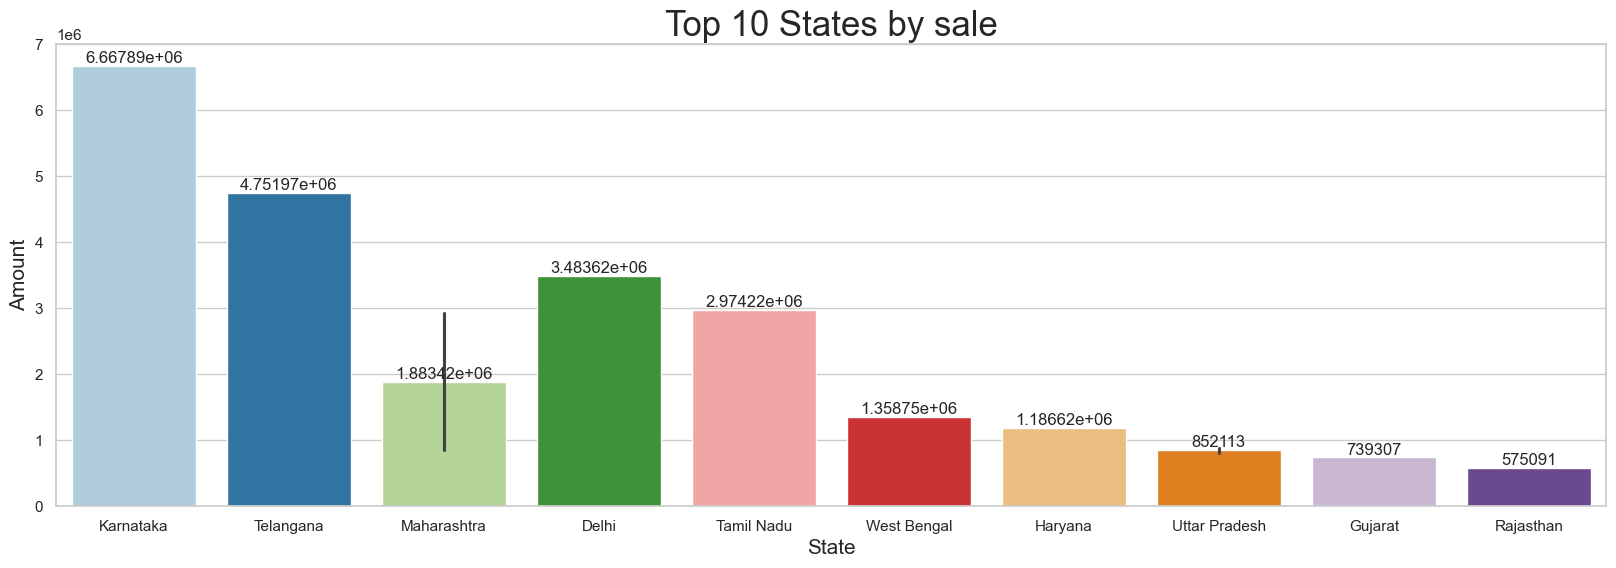

In [348]:
plt.figure(figsize=(20, 6))
top_states = df_g.sort_values('Amount', ascending=False).head(15)
ax=sns.barplot(x='ship-state', y='Amount', data=top_states,palette='Paired')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 States by sale',fontsize=25)
plt.xlabel('State', fontsize=15)
plt.ylabel('Amount', fontsize=15)
plt.xticks(rotation=0)
plt.show()

/var/folders/j7/yfj7nxc90952lcr5lx7fzy9r0000gn/T/ipykernel_50250/3523543585.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='ship-city', y='Amount', data=top_city,palette='Paired')


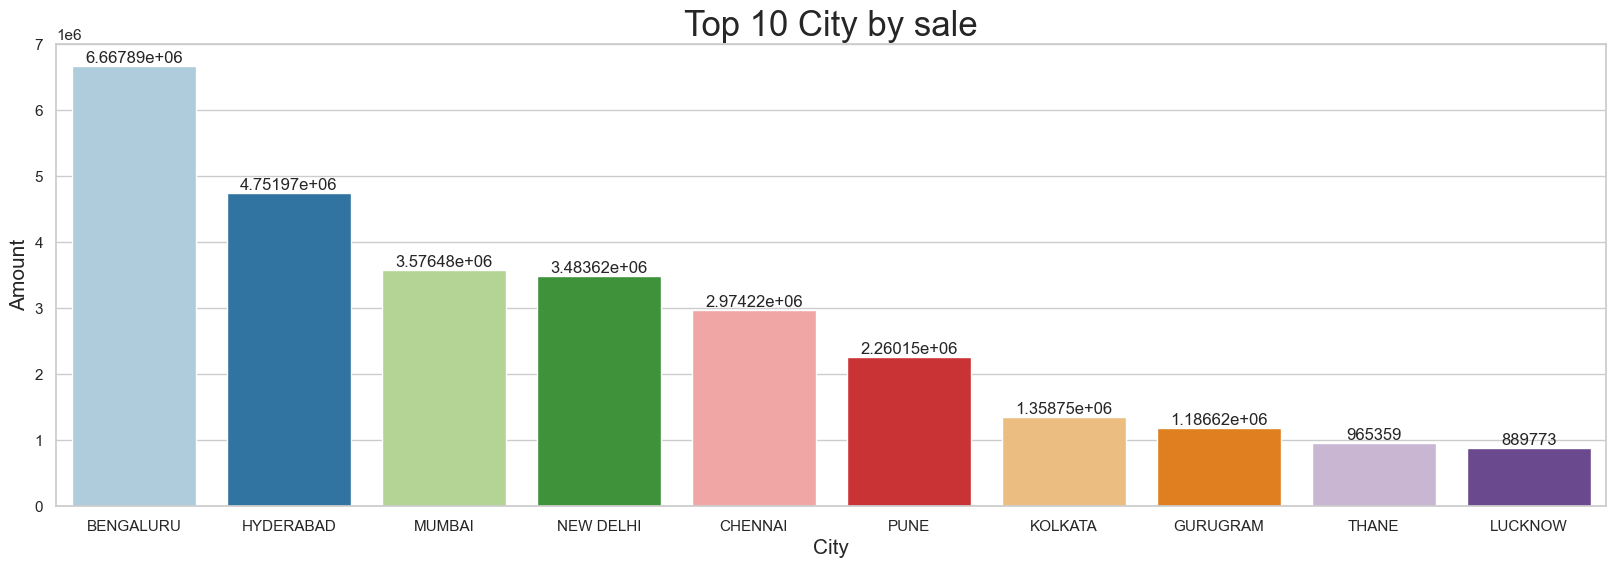

In [340]:
plt.figure(figsize=(20, 6))
top_city = df_g.sort_values('Amount', ascending=False).head(10)
ax=sns.barplot(x='ship-city', y='Amount', data=top_city,palette='paired')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 City by sale',fontsize=25)
plt.xlabel('City', fontsize=15)
plt.ylabel('Amount', fontsize=15)
plt.xticks(rotation=0)
plt.show()

# 6. Business Insights:
### Actionable Insights and Recommendations

## 1. Targeted Marketing Campaigns

### Insight: 
Certain cities and states exhibit higher ORDER FREQUENCIES.
already shown in (# 4. Customer segmentation)
### Recommendation:
Focus marketing efforts on these high-frequency areas. Tailor promotional campaigns to these regions, offering special deals, discounts, or loyalty programs to encourage repeat purchases and attract new customers.

## 2.Personalized Customer Experience

### Insight:
Customers in different regions may have varying preferences and behaviors. already shown in (4. Customer Segmentation & 5.Geographical Analysis)

### Recommendation:
Use customer data to personalize the shopping experience. Implement region-specific recommendations and tailor communication to reflect local preferences, holidays, and events

## 3.Efficient Fulfillment Strategies

### Insight:
 Fulfillment performance can vary by location, affecting delivery times and customer satisfaction. already shown in (3. Fulfillment Analysis)

### Recommendation:
Optimize fulfillment operations by strategically locating warehouses and distribution centers closer to high-order-frequency regions. This will reduce delivery times and improve customer satisfaction.

## 4.Regional Product Offerings

### Insight:
 Certain products may be more popular in specific regions.

### Recommendation:
Curate product offerings based on regional preferences. Introduce region-specific products or variants to cater to local tastes and increase sales.

In [41]:
city_category_sales = df.groupby(['ship-city', 'Category']).agg({'Order ID': 'count'}).reset_index()
city_category_sales.rename(columns={'Order ID': 'Sales Count'}, inplace=True)

In [43]:
city_category_sales.tail()

,ship-city,Category,Sales Count
15180,yavatmal,Blazzer,1
15181,yazali,Trousers,1
15182,yellapur,T-shirt,1
15183,zirakpur,T-shirt,1
15184,ýýýýýýýýýýýý,T-shirt,2


In [46]:
city_sales = city_category_sales.groupby('ship-city')['Sales Count'].sum().reset_index()
top_cities = city_sales.sort_values(by='Sales Count', ascending=False).head(10)
top_cities.head(10)


,ship-city,Sales Count
775,BENGALURU,11243
2904,HYDERABAD,8077
4793,MUMBAI,6125
5391,NEW DELHI,5792
1464,CHENNAI,5430
6156,PUNE,3863
3710,KOLKATA,2380
2618,GURUGRAM,1865
7583,THANE,1701
4395,LUCKNOW,1462


In [48]:
# Filter city_category_sales to include only the top 10 cities
top_city_category_sales = city_category_sales[city_category_sales['ship-city'].isin(top_cities['ship-city'])]
top_city_category_sales.head(10)


,ship-city,Category,Sales Count
1380,BENGALURU,Blazzer,1519
1381,BENGALURU,Perfume,116
1382,BENGALURU,Shirt,4316
1383,BENGALURU,Shoes,19
1384,BENGALURU,Socks,31
1385,BENGALURU,T-shirt,4072
1386,BENGALURU,Trousers,1025
1387,BENGALURU,Wallet,144
1388,BENGALURU,Watch,1
2536,CHENNAI,Blazzer,631


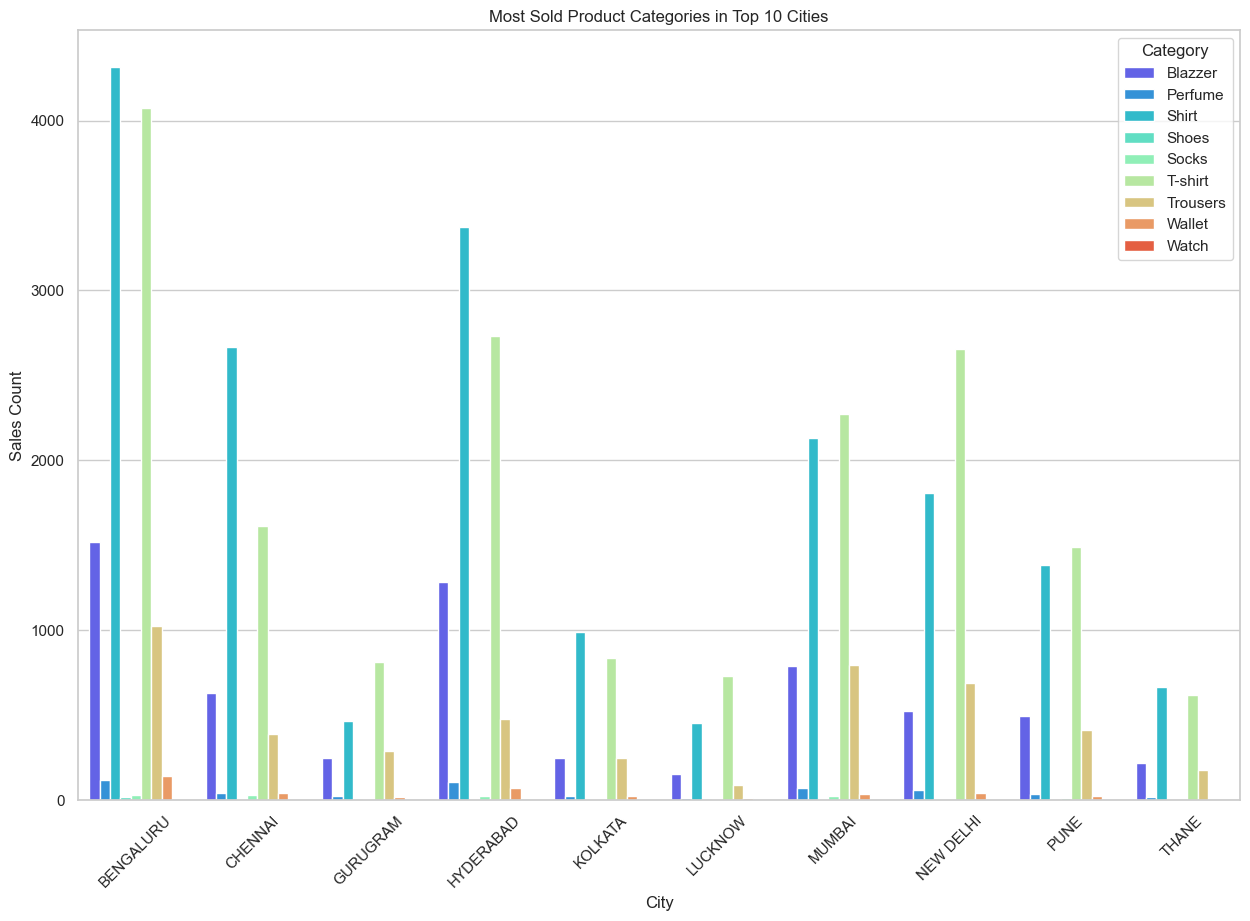

In [50]:
plt.figure(figsize=(15, 10))
sns.barplot(data=top_city_category_sales, x='ship-city', y='Sales Count', hue='Category', palette='rainbow')
plt.title('Most Sold Product Categories in Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Sales Count')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()
